# Data concatenation Logistic Regression  

In [109]:
#import package
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [418]:
#data import
df_q = pd.read_csv('clean_questionnaire_final.csv') 
df_d = pd.read_csv('sleep_diet.csv')
df_s = pd.read_csv('sleep_demographics.csv')
df_e = pd.read_csv('examination_data_columns_cleaned.csv')
df_l = pd.read_csv('lab_data_columns_cleaned.csv')
df_p = pd.read_csv('Patient.csv')


In [111]:
#check what df_d looks like
df_d

,Unnamed: 0,SEQN,WTDRD1,WTDR2D,DR1EXMER,DR1DBIH,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,...,dont_know_salt_use_prep,used_salt_table_yesterday,no_salt_table_yesterday,ord_salt_used_yesterday,lite_salt_used_yesterday,sub_salt_used_yesterday,other_salt_used_yesterday,dontknow_salt_used_yesterday,on_special_diet,not_on_special_diet
0,1,73557,16888.327864,12930.890649,49.0,6.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,2,73558,17932.143865,12684.148869,59.0,4.0,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,73559,59641.812930,39394.236709,49.0,18.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,4,73561,59052.357033,39004.892993,63.0,18.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,5,73562,49890.828664,0.000000,49.0,11.0,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,83723,14116.878928,9661.836186,49.0,21.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0
6260,6261,83724,32115.849467,46169.498764,54.0,10.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0
6261,6262,83726,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6262,6263,83727,14146.781331,10520.302070,59.0,8.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [112]:
#check what df_l looks like
df_l

,SEQN,URDACT,LBDAPBSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,...,LBXTHG,LBXBSE,LBXBMN,URXUTRI,URDFLOW1,URDFLOW2,URDFLOW3,URXPREG,URXUAS,LBDB12
0,73557,11.03,NaN,4.1,129.0,16.0,16.0,10.0,27.0,9.5,...,NaN,NaN,NaN,NaN,0.821,NaN,NaN,NaN,NaN,524.0
1,73558,306.00,NaN,4.7,97.0,18.0,29.0,16.0,23.0,9.2,...,1.21,204.73,8.15,2.0,1.636,NaN,NaN,NaN,NaN,507.0
2,73559,10.53,0.57,3.7,99.0,22.0,16.0,14.0,23.0,8.9,...,1.27,209.64,9.57,NaN,NaN,NaN,NaN,NaN,NaN,732.0
3,73560,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.88,169.82,13.07,NaN,0.575,NaN,NaN,NaN,3.83,NaN
4,73561,173.47,0.92,4.3,78.0,36.0,28.0,31.0,31.0,10.0,...,NaN,NaN,NaN,NaN,0.109,0.137,NaN,NaN,NaN,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,4.04,0.88,4.9,75.0,27.0,26.0,13.0,25.0,10.0,...,NaN,NaN,NaN,2.0,0.462,5.615,NaN,NaN,NaN,720.0
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.20,173.87,12.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,5.13,NaN,4.1,65.0,26.0,13.0,10.0,23.0,9.5,...,6.50,228.46,10.33,2.0,0.619,NaN,NaN,2.0,9.75,388.0
9811,83730,5.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.03,179.73,11.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#check what df_e looks like
df_e

,SEQN,BPXCHR,BPXPLS,BPXPULS,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,...,BPXDI4,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMDBMIC,BMXWAIST,MGD130,MGDCGSZ
0,73557,NaN,86.0,1.0,122.0,72.0,114.0,76.0,102.0,74.0,...,NaN,338,222,78.3,171.3,26.7,NaN,100.0,1.0,55.2
1,73558,NaN,74.0,1.0,156.0,62.0,160.0,80.0,156.0,42.0,...,NaN,472,184,89.5,176.8,28.6,NaN,107.6,1.0,61.5
2,73559,NaN,68.0,1.0,140.0,90.0,140.0,76.0,146.0,80.0,...,NaN,426,246,88.9,175.3,28.9,NaN,109.2,3.0,91.0
3,73560,NaN,64.0,1.0,108.0,38.0,102.0,34.0,104.0,38.0,...,NaN,314,110,32.2,137.3,17.1,2.0,61.0,1.0,32.2
4,73561,NaN,92.0,1.0,136.0,86.0,134.0,88.0,142.0,86.0,...,NaN,412,260,52.0,162.4,19.7,NaN,NaN,2.0,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,NaN,60.0,1.0,110.0,68.0,116.0,74.0,112.0,76.0,...,NaN,338,218,71.8,171.3,24.5,NaN,87.1,1.0,70.1
9809,83728,110.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,11.3,84.4,15.9,2.0,47.2,NaN,NaN
9810,83729,NaN,80.0,1.0,136.0,82.0,130.0,82.0,138.0,80.0,...,NaN,404,244,89.6,162.3,34.0,NaN,102.7,1.0,46.6
9811,83730,72.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,22.8,119.1,16.1,2.0,53.0,1.0,20.8


In [114]:
#match patient row
df_l1 = df_l[df_l['SEQN'].isin(df_p['SEQN'])]
df_l1

,SEQN,URDACT,LBDAPBSI,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,...,LBXTHG,LBXBSE,LBXBMN,URXUTRI,URDFLOW1,URDFLOW2,URDFLOW3,URXPREG,URXUAS,LBDB12
0,73557,11.03,NaN,4.1,129.0,16.0,16.0,10.0,27.0,9.5,...,NaN,NaN,NaN,NaN,0.821,NaN,NaN,NaN,NaN,524.0
1,73558,306.00,NaN,4.7,97.0,18.0,29.0,16.0,23.0,9.2,...,1.21,204.73,8.15,2.0,1.636,NaN,NaN,NaN,NaN,507.0
2,73559,10.53,0.57,3.7,99.0,22.0,16.0,14.0,23.0,8.9,...,1.27,209.64,9.57,NaN,NaN,NaN,NaN,NaN,NaN,732.0
4,73561,173.47,0.92,4.3,78.0,36.0,28.0,31.0,31.0,10.0,...,NaN,NaN,NaN,NaN,0.109,0.137,NaN,NaN,NaN,225.0
5,73562,166.22,NaN,4.3,95.0,24.0,16.0,18.0,25.0,9.3,...,1.10,187.63,13.99,2.0,1.187,NaN,NaN,NaN,NaN,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,83723,10.83,1.00,4.1,64.0,24.0,23.0,17.0,28.0,9.0,...,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,NaN,621.0
9805,83724,5.98,NaN,3.8,43.0,20.0,12.0,26.0,25.0,8.8,...,0.91,172.34,8.20,NaN,0.706,NaN,NaN,NaN,NaN,837.0
9807,83726,4.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,1.056,NaN,NaN,NaN,NaN,NaN
9808,83727,4.04,0.88,4.9,75.0,27.0,26.0,13.0,25.0,10.0,...,NaN,NaN,NaN,2.0,0.462,5.615,NaN,NaN,NaN,720.0


In [115]:
#match patient row
df_e1 = df_e[df_e['SEQN'].isin(df_p['SEQN'])]
df_e1

,SEQN,BPXCHR,BPXPLS,BPXPULS,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,...,BPXDI4,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMDBMIC,BMXWAIST,MGD130,MGDCGSZ
0,73557,NaN,86.0,1.0,122.0,72.0,114.0,76.0,102.0,74.0,...,NaN,338,222,78.3,171.3,26.7,NaN,100.0,1.0,55.2
1,73558,NaN,74.0,1.0,156.0,62.0,160.0,80.0,156.0,42.0,...,NaN,472,184,89.5,176.8,28.6,NaN,107.6,1.0,61.5
2,73559,NaN,68.0,1.0,140.0,90.0,140.0,76.0,146.0,80.0,...,NaN,426,246,88.9,175.3,28.9,NaN,109.2,3.0,91.0
4,73561,NaN,92.0,1.0,136.0,86.0,134.0,88.0,142.0,86.0,...,NaN,412,260,52.0,162.4,19.7,NaN,NaN,2.0,30.9
5,73562,NaN,60.0,1.0,160.0,84.0,158.0,82.0,154.0,80.0,...,NaN,472,246,105.0,158.7,41.7,NaN,123.1,1.0,53.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,83723,NaN,74.0,1.0,NaN,NaN,138.0,60.0,142.0,68.0,...,68.0,418,196,99.5,173.5,33.1,NaN,115.0,2.0,92.4
9805,83724,NaN,54.0,1.0,164.0,70.0,168.0,66.0,168.0,66.0,...,NaN,500,202,77.1,176.0,24.9,NaN,92.3,1.0,82.8
9807,83726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,79.0,171.7,26.8,NaN,97.7,1.0,85.7
9808,83727,NaN,60.0,1.0,110.0,68.0,116.0,74.0,112.0,76.0,...,NaN,338,218,71.8,171.3,24.5,NaN,87.1,1.0,70.1


In [419]:
#remove column with 80% or more null for S

df_s2 = df_s.columns[df_s.isnull().mean() < 0.2]
df_s3 = df_s[df_s2]

#remove column with 80% or more null for E
df_e2 = df_e1.columns[df_e1.isnull().mean() < 0.2]
df_e3 = df_e1[df_e2]

#remove column with 80% or more null for L

df_l2 = df_l1.columns[df_l1.isnull().mean() < 0.2]
df_l3 = df_l1[df_l2]

##remove column with 80% or more null for D

df_d2 = df_d.columns[df_d.isnull().mean() < 0.2]
df_d3 = df_d[df_d2]


In [117]:
#describe new demographic
df_s3.describe()

,SEQN,DMDHRAGE,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,Age_btwn_0_10,Age_btwn_10_20,Age_btwn_20_30,...,Income_Family_20000_24999,Income_Family_25000_34999,Income_Family_35000_44999,Income_Family_45000_54999,Income_Family_55000_64999,Income_Family_65000_74999,Income_Family_20000_and_over,Income_Family_under_20000,Income_Family_75000_99999,Income_Family_100000_and_over
count,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,5946.000000,6462.0,6462.000000,6462.000000,...,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000
mean,78683.080006,50.264933,37978.421208,37993.070198,1.485763,110.956825,2.431118,0.0,0.107552,0.136335,...,0.087557,0.109211,0.091637,0.075161,0.053664,0.040640,0.023694,0.010513,0.080810,0.172132
std,2924.022572,16.336845,29548.760479,30709.429627,0.499836,4.332686,1.648121,0.0,0.309838,0.343171,...,0.282672,0.311928,0.288535,0.263671,0.225371,0.197471,0.152105,0.102001,0.272564,0.377525
min,73557.000000,18.000000,5366.680272,0.000000,1.000000,104.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76174.500000,38.000000,17553.965880,17226.575275,1.000000,107.000000,1.020000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78735.500000,50.000000,26265.026890,26393.607325,1.000000,111.000000,1.990000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,81203.750000,63.000000,49146.845580,48810.356032,2.000000,115.000000,3.920000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83729.000000,80.000000,167884.543700,171395.264900,2.000000,118.000000,5.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
#describe new demographic
df_q.describe()

,Unnamed: 0,SEQN,ALQ101,BPQ020,BPQ056,BPQ059,BPQ080,CBD070,CBD090,CBD110,...,SMQ863,SMDANY,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD140,WHQ150
count,6462.000000,6462.000000,5412.000000,6457.000000,6460.000000,6461.000000,6426.000000,6228.000000,6205.000000,6315.000000,...,5422.000000,5453.000000,6374.000000,6375.000000,6462.000000,6462.000000,6328.000000,5670.000000,6024.000000,5987.000000
mean,3230.500000,78683.080006,0.700296,0.336379,0.244272,0.133261,0.316838,439.991169,38.161160,83.571496,...,0.004426,0.255089,66.338092,175.677020,1.958063,2.237543,175.262326,0.361376,193.587649,39.959245
std,1865.563052,2924.022572,0.458171,0.472507,0.429688,0.339883,0.465280,318.796547,71.809832,164.354385,...,0.066390,0.435951,4.135938,46.977242,1.015103,0.634895,49.553914,0.480441,54.704413,17.093198
min,0.000000,73557.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,48.000000,75.000000,1.000000,1.000000,75.000000,0.000000,85.000000,10.000000
25%,1615.250000,76174.500000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,...,0.000000,0.000000,63.000000,142.000000,1.000000,2.000000,140.000000,0.000000,155.000000,25.000000
50%,3230.500000,78735.500000,1.000000,0.000000,0.000000,0.000000,0.000000,400.000000,0.000000,0.000000,...,0.000000,0.000000,66.000000,170.000000,2.000000,2.000000,168.000000,0.000000,185.000000,38.000000
75%,4845.750000,81203.750000,1.000000,1.000000,0.000000,0.000000,1.000000,600.000000,50.000000,100.000000,...,0.000000,1.000000,69.000000,200.000000,3.000000,3.000000,200.000000,1.000000,220.000000,53.000000
max,6461.000000,83729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4285.000000,1542.000000,2000.000000,...,1.000000,1.000000,81.000000,493.000000,9.000000,9.000000,559.000000,1.000000,600.000000,80.000000


In [119]:
df_e3.describe()

,SEQN,BPXPLS,BPXPULS,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ
count,6264.000000,6057.000000,6058.000000,5734.000000,5734.000000,5941.000000,5941.000000,5947.000000,5947.000000,6264.000000,6264.000000,6198.000000,6195.000000,6185.000000,5916.000000,5859.000000,5745.000000
mean,78673.762133,72.953277,1.019313,121.730729,68.904430,121.901700,68.370308,121.577266,68.303683,351.500958,197.732759,80.504614,167.118190,28.737332,97.735666,1.139956,70.973020
std,2922.828853,11.935343,0.137635,17.866416,13.029463,17.881911,13.702916,17.809836,13.895625,86.066552,54.037043,22.229119,10.105974,7.216603,17.068238,0.424424,22.106414
min,73557.000000,40.000000,1.000000,66.000000,0.000000,66.000000,0.000000,62.000000,0.000000,0.000000,0.000000,32.300000,135.400000,14.100000,55.500000,1.000000,14.800000
25%,76158.750000,64.000000,1.000000,108.000000,62.000000,110.000000,62.000000,110.000000,62.000000,324.000000,180.000000,65.000000,159.800000,23.700000,85.300000,1.000000,54.300000
50%,78718.500000,72.000000,1.000000,118.000000,70.000000,118.000000,70.000000,118.000000,70.000000,352.000000,206.000000,77.200000,166.800000,27.500000,96.100000,1.000000,67.100000
75%,81192.250000,80.000000,1.000000,130.000000,76.000000,132.000000,76.000000,132.000000,76.000000,392.000000,228.000000,91.900000,174.300000,32.200000,107.800000,1.000000,87.000000
max,83729.000000,160.000000,2.000000,228.000000,122.000000,230.000000,116.000000,228.000000,118.000000,686.000000,350.000000,222.600000,202.600000,82.900000,177.900000,3.000000,162.800000


In [120]:
df_l3.describe()

,SEQN,URDACT,LBXSAL,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,...,LBDHDD,LBXHA,LBXHBS,LBDHEG,LBXGH,ORXHPV,LBXTC,LBXTTG,URDFLOW1,LBDB12
count,6264.000000,6124.000000,5928.000000,5927.000000,5926.000000,5926.000000,5928.000000,5928.000000,5897.000000,5926.000000,...,5945.000000,5966.000000,5964.000000,5966.000000,6000.000000,5057.000000,5945.000000,5909.000000,5668.000000,5315.000000
mean,78673.762133,45.019850,4.265385,67.956302,25.280796,24.667735,13.141026,25.240047,9.465779,187.348296,...,52.621531,1.517432,1.730215,1.943848,5.686083,1.994859,185.918923,1.999492,0.950676,640.119097
std,2922.828853,311.503063,0.345366,27.210674,18.478071,18.915806,6.139376,2.290576,0.367662,42.120476,...,15.779256,0.499738,0.443885,0.230233,1.042733,0.369920,41.979837,0.059617,0.993807,752.036580
min,73557.000000,0.210000,2.400000,9.000000,9.000000,6.000000,1.000000,16.000000,7.600000,72.000000,...,10.000000,1.000000,1.000000,1.000000,3.500000,1.000000,69.000000,1.000000,0.000000,18.000000
25%,76158.750000,4.800000,4.100000,52.000000,19.000000,16.000000,9.000000,24.000000,9.200000,158.000000,...,42.000000,1.000000,1.000000,2.000000,5.200000,2.000000,157.000000,2.000000,0.404000,381.000000
50%,78718.500000,7.270000,4.300000,64.000000,22.000000,20.000000,12.000000,25.000000,9.500000,184.000000,...,50.000000,2.000000,2.000000,2.000000,5.500000,2.000000,182.000000,2.000000,0.680000,514.000000
75%,81192.250000,13.832500,4.500000,78.000000,27.000000,27.000000,15.250000,27.000000,9.700000,213.000000,...,61.000000,2.000000,2.000000,2.000000,5.800000,2.000000,211.000000,2.000000,1.163000,711.000000
max,83729.000000,9000.000000,5.600000,907.000000,882.000000,536.000000,95.000000,43.000000,14.800000,639.000000,...,173.000000,2.000000,2.000000,2.000000,17.500000,3.000000,813.000000,3.000000,26.000000,26801.000000


In [121]:
df_d3.describe()

,Unnamed: 0,SEQN,WTDRD1,WTDR2D,DR1EXMER,DR1DBIH,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,...,dont_know_salt,rarely_salt_prep,occasionally_salt_prep,often_salt_prep,refused_salt_prep,dont_know_salt_use_prep,used_salt_table_yesterday,no_salt_table_yesterday,on_special_diet,not_on_special_diet
count,6264.000000,6264.000000,6264.000000,5679.000000,5720.000000,5665.000000,5679.000000,5679.000000,5679.000000,5679.000000,...,5720.000000,5720.00000,5720.000000,5720.000000,5720.0,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000
mean,3132.500000,78673.762133,39428.696334,43608.772350,43.588986,15.835305,15.764219,2119.385103,82.600650,254.402673,...,0.014161,0.07028,0.175699,0.335140,0.0,0.021154,0.209790,0.782343,0.157343,0.836538
std,1808.405375,2922.828853,39810.597709,57686.042640,20.436882,11.774837,6.205976,1033.304409,47.596229,130.052887,...,0.118164,0.25564,0.380597,0.472081,0.0,0.143910,0.407194,0.412689,0.364155,0.369819
min,1.000000,73557.000000,0.000000,0.000000,2.000000,-31.000000,1.000000,117.000000,0.000000,8.670000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1566.750000,76158.750000,13691.710070,10430.027899,25.000000,7.000000,11.000000,1433.000000,51.970000,165.750000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000
50%,3132.500000,78718.500000,25432.670834,23712.974560,49.000000,15.000000,15.000000,1938.000000,73.700000,232.220000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000
75%,4698.250000,81192.250000,52587.248541,54397.511453,59.000000,22.000000,19.000000,2590.000000,101.675000,313.530000,...,0.000000,0.00000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000
max,6264.000000,83729.000000,267526.890966,818626.657231,91.000000,74.000000,49.000000,12108.000000,869.490000,1423.870000,...,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
#droppoing columns that are all 0
df_s4 = df_s3.drop(columns = ['WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR','Age_btwn_0_10','Age_over_80'])

In [123]:
#Save new clean file
df_l3.to_csv('df_l3.csv')
df_e3.to_csv('df_e3.csv')


In [124]:
#import clean file
df_lab = pd.read_csv('df_l3.csv') 
df_exam = pd.read_csv('df_e3.csv') 

In [125]:
#Remove the first unnamed column in df_q
df_q = df_q.drop(columns = 'Unnamed: 0')
df_l5 = df_lab.drop(columns = 'Unnamed: 0')
df_e5 = df_exam.drop(columns = ['Unnamed: 0'])

In [126]:
#remove 0 for this variables
df_e5 = df_e5.replace({'BPXSYM':0}, np.nan)
df_e5 = df_e5.replace({'BPXDIM':0}, np.nan)

In [263]:
#df_combo = pd.concat([df_demo_s, df_q, df_m_new], axis=1, sort=False)
df_combo = pd.concat([df_s4, df_q, df_l5, df_e5], axis=1, sort=False)

df_combo

,SEQN,DMDHRAGE,Age_btwn_10_20,Age_btwn_20_30,Age_btwn_30_40,Age_btwn_40_50,Age_btwn_50_60,Age_btwn_60_70,Male,Female,...,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ
0,73557,69,0,0,0,0,1,0,1,0,...,102.0,74.0,338.0,222.0,78.3,171.3,26.7,100.0,1.0,55.2
1,73558,54,0,0,0,1,0,0,1,0,...,156.0,42.0,472.0,184.0,89.5,176.8,28.6,107.6,1.0,61.5
2,73559,72,0,0,0,0,0,1,1,0,...,146.0,80.0,426.0,246.0,88.9,175.3,28.9,109.2,3.0,91.0
3,73561,78,0,0,0,0,0,1,0,1,...,142.0,86.0,412.0,260.0,52.0,162.4,19.7,NaN,2.0,30.9
4,73562,56,0,0,0,1,0,0,1,0,...,154.0,80.0,472.0,246.0,105.0,158.7,41.7,123.1,1.0,53.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,83723,61,0,0,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,83724,80,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,83726,43,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,83727,19,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
# convert everything to float values
df_combo = df_combo.apply(pd.to_numeric)

In [265]:
#Export to Eyeball check
df_combo.to_csv('df_combo_check.csv')

In [266]:
#Checking Null
check_null = df_combo.isnull().sum(1)
count_null = pd.Series(check_null)
np.count_nonzero(count_null, axis=0)

5873

In [267]:
df_combo.mean()

SEQN              78683.080006
DMDHRAGE             50.264933
Age_btwn_10_20        0.107552
Age_btwn_20_30        0.136335
Age_btwn_30_40        0.143454
                      ...     
BMXHT               167.118190
BMXBMI               28.737332
BMXWAIST             97.735666
MGD130                1.139956
MGDCGSZ              70.973020
Length: 343, dtype: float64

In [268]:
#Fill in the Null
data_combo1 = df_combo.fillna(df_combo.mean())

/Users/chris/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
/Users/chris/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [269]:
#Checking Null
check_null = data_combo1.isnull().sum(1)
count_null = pd.Series(check_null)
np.count_nonzero(count_null, axis=0)

5873

In [270]:
#check null
data_combo1.to_csv('data_combo.csv')

In [271]:
#Bring back data
data = pd.read_csv('data_combo.csv', skipinitialspace=True)

In [272]:
#drop unnamed column
data = data.drop(columns = 'Unnamed: 0')
data

,SEQN,DMDHRAGE,Age_btwn_10_20,Age_btwn_20_30,Age_btwn_30_40,Age_btwn_40_50,Age_btwn_50_60,Age_btwn_60_70,Male,Female,...,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ
0,73557,69,0,0,0,0,1,0,1,0,...,102.0,74.0,338.0,222.0,78.3,171.3,26.7,100.0,1.0,55.2
1,73558,54,0,0,0,1,0,0,1,0,...,156.0,42.0,472.0,184.0,89.5,176.8,28.6,107.6,1.0,61.5
2,73559,72,0,0,0,0,0,1,1,0,...,146.0,80.0,426.0,246.0,88.9,175.3,28.9,109.2,3.0,91.0
3,73561,78,0,0,0,0,0,1,0,1,...,142.0,86.0,412.0,260.0,52.0,162.4,19.7,NaN,2.0,30.9
4,73562,56,0,0,0,1,0,0,1,0,...,154.0,80.0,472.0,246.0,105.0,158.7,41.7,123.1,1.0,53.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,83723,61,0,0,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,83724,80,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,83726,43,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,83727,19,0,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
#Fill null with mean
data = data.fillna(data.mean())
data

,SEQN,DMDHRAGE,Age_btwn_10_20,Age_btwn_20_30,Age_btwn_30_40,Age_btwn_40_50,Age_btwn_50_60,Age_btwn_60_70,Male,Female,...,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ
0,73557,69,0,0,0,0,1,0,1,0,...,102.000000,74.000000,338.000000,222.000000,78.300000,171.30000,26.700000,100.000000,1.000000,55.20000
1,73558,54,0,0,0,1,0,0,1,0,...,156.000000,42.000000,472.000000,184.000000,89.500000,176.80000,28.600000,107.600000,1.000000,61.50000
2,73559,72,0,0,0,0,0,1,1,0,...,146.000000,80.000000,426.000000,246.000000,88.900000,175.30000,28.900000,109.200000,3.000000,91.00000
3,73561,78,0,0,0,0,0,1,0,1,...,142.000000,86.000000,412.000000,260.000000,52.000000,162.40000,19.700000,97.735666,2.000000,30.90000
4,73562,56,0,0,0,1,0,0,1,0,...,154.000000,80.000000,472.000000,246.000000,105.000000,158.70000,41.700000,123.100000,1.000000,53.10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,83723,61,0,0,0,0,1,0,1,0,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6458,83724,80,0,0,0,0,0,0,1,0,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6459,83726,43,0,0,0,0,0,0,1,0,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6460,83727,19,0,0,0,0,0,0,1,0,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302


In [274]:
#Checking Null
check_null = data.isnull().sum(1)
count_null = pd.Series(check_null)
np.count_nonzero(count_null, axis=0)

0

In [279]:
#Drop these columns
data_clean = data.drop(columns=['SEQN', 'SEQN.1', 'SEQN.2', 'SEQN.3', 'other_race', 'Unnamed: 27', 'Interpreter_no_MEC', 'Proxy_no_MEC_interview', 'Spanish_MEC_interview', 'Interpreter_no_family', 
                              'One_person_in_household', 'Two_people_in_household', 'Three_people_in_household', 'Four_people_in_household', 'Five_people_in_household', 'Six_people_in_household', 
                              'Seven_or_more_people_in_household', 'One_person_in_family', 'Two_people_in_family', 'Three_people_in_family', 'Four_people_in_family', 'Five_people_in_family', 
                              'Six_people_in_family', 'Seven_or_more_people_in_family', 'zero_children_younger_than_five_in_family', 'one_child_younger_than_five_in_family', 
                             'two_children_younger_than_five_in_family', 'three_or_more_children_younger_than_five_in_family', 'zero_children_older_than_five_in_family', 'one_child_older_than_five_in_family',
                             'two_children_older_than_five_in_family', 'three_children_older_than_five_in_family', 'four_or_more_children_older_than_five_in_family', 'zero_adults_older_than_sixty_in_HH',
                             'one_adult_older_than_sixty_in_HH', 'two_adults_older_than_sixty_in_HH', 'three_or_more_adults_older_than_sixty_in_HH'])

In [285]:
#Check for correlation
df_correlation = data_clean.corr().abs()
df_correlation.to_csv('df_correlation.csv')
df_correlation

,DMDHRAGE,Age_btwn_10_20,Age_btwn_20_30,Age_btwn_30_40,Age_btwn_40_50,Age_btwn_50_60,Age_btwn_60_70,Male,Female,Interviewed_only,...,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ
DMDHRAGE,1.000000,0.148089,0.293392,0.102495,0.099376,0.287782,0.375946,0.005560,0.005560,0.008495,...,0.005432,0.018163,0.000721,0.010542,0.012327,0.002759,0.012404,0.005453,0.002375,0.008697
Age_btwn_10_20,0.148089,1.000000,0.137927,0.142069,0.133636,0.133083,0.097671,0.001450,0.001450,0.012449,...,0.004337,0.012392,0.000145,0.005575,0.003613,0.000492,0.008498,0.004457,0.006789,0.013916
Age_btwn_20_30,0.293392,0.137927,1.000000,0.162597,0.152946,0.152314,0.111784,0.000496,0.000496,0.007865,...,0.003923,0.015289,0.003244,0.010683,0.004438,0.022959,0.018643,0.005755,0.019012,0.005532
Age_btwn_30_40,0.102495,0.142069,0.162597,1.000000,0.157539,0.156887,0.115141,0.012867,0.012867,0.008719,...,0.007299,0.004267,0.010402,0.004369,0.018751,0.022120,0.007114,0.008357,0.004329,0.019292
Age_btwn_40_50,0.099376,0.133636,0.152946,0.157539,1.000000,0.147575,0.108306,0.004564,0.004564,0.017554,...,0.013646,0.004172,0.014282,0.007471,0.003110,0.005630,0.005340,0.000388,0.012489,0.004018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMXHT,0.002759,0.000492,0.022959,0.022120,0.005630,0.030588,0.011256,0.000027,0.000027,0.020573,...,0.002911,0.086770,0.003082,0.096042,0.422302,1.000000,0.019433,0.151966,0.034440,0.677597
BMXBMI,0.012404,0.008498,0.018643,0.007114,0.005340,0.006670,0.007192,0.006613,0.006613,0.003281,...,0.173144,0.132935,0.160419,0.138510,0.890112,0.019433,1.000000,0.864872,0.000173,0.065983
BMXWAIST,0.005453,0.004457,0.005755,0.008357,0.000388,0.008110,0.002491,0.012159,0.012159,0.006728,...,0.241412,0.143777,0.231504,0.159431,0.854801,0.151966,0.864872,1.000000,0.014216,0.113176
MGD130,0.002375,0.006789,0.019012,0.004329,0.012489,0.006379,0.006021,0.003008,0.003008,0.002649,...,0.003510,0.021983,0.000910,0.021263,0.014332,0.034440,0.000173,0.014216,1.000000,0.058457


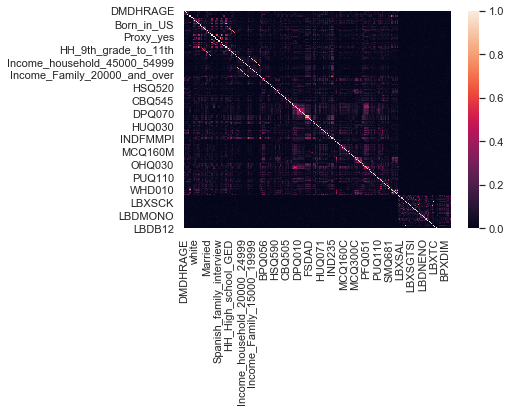

In [515]:
#plot correlation make
sns.heatmap(data_clean.corr().abs())
plt.show()

In [287]:
# Create correlation matrix
corr_matrix = data_clean.corr().abs()

# Select upper triangle of correlation matrix
upper_new = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop_new = [column for column in upper_new.columns if any(upper_new[column] > 0.95)]

# Drop features
data_new_test = data_clean.drop(to_drop_new, axis=1)

In [516]:
#check new clean data
data_new_test

,DMDHRAGE,Age_btwn_10_20,Age_btwn_20_30,Age_btwn_30_40,Age_btwn_40_50,Age_btwn_50_60,Age_btwn_60_70,Male,Interviewed_only,Mexi,...,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ
0,69,0,0,0,0,1,0,1,0,0,...,102.000000,74.000000,338.000000,222.000000,78.300000,171.30000,26.700000,100.000000,1.000000,55.20000
1,54,0,0,0,1,0,0,1,0,0,...,156.000000,42.000000,472.000000,184.000000,89.500000,176.80000,28.600000,107.600000,1.000000,61.50000
2,72,0,0,0,0,0,1,1,0,0,...,146.000000,80.000000,426.000000,246.000000,88.900000,175.30000,28.900000,109.200000,3.000000,91.00000
3,78,0,0,0,0,0,1,0,0,0,...,142.000000,86.000000,412.000000,260.000000,52.000000,162.40000,19.700000,97.735666,2.000000,30.90000
4,56,0,0,0,1,0,0,1,0,1,...,154.000000,80.000000,472.000000,246.000000,105.000000,158.70000,41.700000,123.100000,1.000000,53.10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,61,0,0,0,0,1,0,1,0,1,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6458,80,0,0,0,0,0,0,1,0,0,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6459,43,0,0,0,0,0,0,1,0,1,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6460,19,0,0,0,0,0,0,1,0,0,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302


In [289]:
# Select upper triangle of correlation matrix
upper = df_correlation.where(np.triu(np.ones(df_correlation.shape), k=1).astype(np.bool))
print(); print(upper)


                DMDHRAGE  Age_btwn_10_20  Age_btwn_20_30  Age_btwn_30_40  \
DMDHRAGE             NaN        0.148089        0.293392        0.102495   
Age_btwn_10_20       NaN             NaN        0.137927        0.142069   
Age_btwn_20_30       NaN             NaN             NaN        0.162597   
Age_btwn_30_40       NaN             NaN             NaN             NaN   
Age_btwn_40_50       NaN             NaN             NaN             NaN   
...                  ...             ...             ...             ...   
BMXHT                NaN             NaN             NaN             NaN   
BMXBMI               NaN             NaN             NaN             NaN   
BMXWAIST             NaN             NaN             NaN             NaN   
MGD130               NaN             NaN             NaN             NaN   
MGDCGSZ              NaN             NaN             NaN             NaN   

                Age_btwn_40_50  Age_btwn_50_60  Age_btwn_60_70      Male  \
DMDHRAGE  

In [290]:
# Find index of feature columns with correlation greater than 0.95
to_drop = upper

for col in to_drop.columns:
    if 1 in to_drop[col].tolist():
        to_drop = to_drop.drop(columns=col)
        
to_drop

,DMDHRAGE,Age_btwn_10_20,Age_btwn_20_30,Age_btwn_30_40,Age_btwn_40_50,Age_btwn_50_60,Age_btwn_60_70,Male,Interviewed_only,Mexi,...,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ
DMDHRAGE,NaN,0.148089,0.293392,0.102495,0.099376,0.287782,0.375946,0.005560,0.008495,0.085538,...,0.005432,0.018163,0.000721,0.010542,0.012327,0.002759,0.012404,0.005453,0.002375,0.008697
Age_btwn_10_20,NaN,NaN,0.137927,0.142069,0.133636,0.133083,0.097671,0.001450,0.012449,0.089618,...,0.004337,0.012392,0.000145,0.005575,0.003613,0.000492,0.008498,0.004457,0.006789,0.013916
Age_btwn_20_30,NaN,NaN,NaN,0.162597,0.152946,0.152314,0.111784,0.000496,0.007865,0.000267,...,0.003923,0.015289,0.003244,0.010683,0.004438,0.022959,0.018643,0.005755,0.019012,0.005532
Age_btwn_30_40,NaN,NaN,NaN,NaN,0.157539,0.156887,0.115141,0.012867,0.008719,0.015832,...,0.007299,0.004267,0.010402,0.004369,0.018751,0.022120,0.007114,0.008357,0.004329,0.019292
Age_btwn_40_50,NaN,NaN,NaN,NaN,NaN,0.147575,0.108306,0.004564,0.017554,0.027652,...,0.013646,0.004172,0.014282,0.007471,0.003110,0.005630,0.005340,0.000388,0.012489,0.004018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMXHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019433,0.151966,0.034440,0.677597
BMXBMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864872,0.000173,0.065983
BMXWAIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014216,0.113176
MGD130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058457


In [291]:
#keep this columns
column_list = list(to_drop)
column_list

['DMDHRAGE',
 'Age_btwn_10_20',
 'Age_btwn_20_30',
 'Age_btwn_30_40',
 'Age_btwn_40_50',
 'Age_btwn_50_60',
 'Age_btwn_60_70',
 'Male',
 'Interviewed_only',
 'Mexi',
 'other_hispanic',
 'white',
 'black',
 'asian',
 'Served_in_armed_forces',
 'Born_in_US',
 'US_citizen',
 'Nov_April',
 'Less_than_9th_grade',
 'Ninth_to_12th_grade',
 'High_school_or_GED',
 'Some_college_or_AA',
 'College_or_above',
 'Married',
 'Widowed',
 'Divorced',
 'Separated',
 'Never_married',
 'Living_with_partner',
 'English',
 'Proxy_yes',
 'Interpreter_yes',
 'English_family_interview',
 'Proxy_yes_family_interview',
 'Interpreter_yes_family',
 'English_MEC_interview',
 'Proxy_yes_MEC_interview',
 'Interpreter_yes_MEC',
 'HH_male',
 'HH_USA',
 'HH_others',
 'HH_Less_than_9th_grade',
 'HH_9th_grade_to_11th',
 'HH_High_school_GED',
 'HH_some_college',
 'HH_college_grad',
 'HH_married',
 'HH_widowed',
 'HH_divorced',
 'HH_separated',
 'HH_never_married',
 'HH_living_with_partner',
 'Income_household_0_4999',
 'In

In [294]:
#post correlation cleaning dataset
data_new3 = data_clean[column_list]

In [295]:
#anymore nulls left?
data_new3.isnull().sum() 

DMDHRAGE          0
Age_btwn_10_20    0
Age_btwn_20_30    0
Age_btwn_30_40    0
Age_btwn_40_50    0
                 ..
BMXHT             0
BMXBMI            0
BMXWAIST          0
MGD130            0
MGDCGSZ           0
Length: 297, dtype: int64

In [296]:
#drop duplicates
data_test = data_new3.drop_duplicates(keep = 'first')
data_test

,DMDHRAGE,Age_btwn_10_20,Age_btwn_20_30,Age_btwn_30_40,Age_btwn_40_50,Age_btwn_50_60,Age_btwn_60_70,Male,Interviewed_only,Mexi,...,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ
0,69,0,0,0,0,1,0,1,0,0,...,102.000000,74.000000,338.000000,222.000000,78.300000,171.30000,26.700000,100.000000,1.000000,55.20000
1,54,0,0,0,1,0,0,1,0,0,...,156.000000,42.000000,472.000000,184.000000,89.500000,176.80000,28.600000,107.600000,1.000000,61.50000
2,72,0,0,0,0,0,1,1,0,0,...,146.000000,80.000000,426.000000,246.000000,88.900000,175.30000,28.900000,109.200000,3.000000,91.00000
3,78,0,0,0,0,0,1,0,0,0,...,142.000000,86.000000,412.000000,260.000000,52.000000,162.40000,19.700000,97.735666,2.000000,30.90000
4,56,0,0,0,1,0,0,1,0,1,...,154.000000,80.000000,472.000000,246.000000,105.000000,158.70000,41.700000,123.100000,1.000000,53.10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,61,0,0,0,0,1,0,1,0,1,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6458,80,0,0,0,0,0,0,1,0,0,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6459,43,0,0,0,0,0,0,1,0,1,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302
6460,19,0,0,0,0,0,0,1,0,0,...,121.577266,68.303683,364.355784,205.542317,80.504614,167.11819,28.737332,97.735666,1.139956,70.97302


In [487]:
#change BPXPULS into 1, 0 instead of 1, 2
data_testx = data_test.replace({'BPXPULS':2}, 0)

In [488]:
#change this to the right binary
data_testx = data_testx.replace({'LBXHA':2}, 0)
data_testx = data_testx.replace({'LBXHBS':2}, 0)
data_testx = data_testx.replace({'LBDHEG':2}, 0)

In [489]:
#check duplication
data_dup = data_test[data_test.duplicated(subset=None, keep='first')]
data_dup

,DMDHRAGE,Age_btwn_10_20,Age_btwn_20_30,Age_btwn_30_40,Age_btwn_40_50,Age_btwn_50_60,Age_btwn_60_70,Male,Interviewed_only,Mexi,...,BPXSY3,BPXDI3,BPXSYM,BPXDIM,BMXWT,BMXHT,BMXBMI,BMXWAIST,MGD130,MGDCGSZ


In [490]:
#Rename 'SLQ050' into 'y'
data1 = data_testx.rename(columns={'SLQ050':'y'})

In [495]:
# define X 
X = data1x.loc[:, data1.columns != 'y']
y = data1x.loc[:, data1.columns == 'y']

In [497]:
#Log Res for SLQ050
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.361725
         Iterations 7
                                 Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.350    
Dependent Variable:        y                     AIC:                   5266.9311
Date:                      2019-12-12 08:47      BIC:                   7271.9446
No. Observations:          6462                  Log-Likelihood:        -2337.5  
Df Model:                  295                   LL-Null:               -3596.5  
Df Residuals:              6166                  LLR p-value:           0.0000   
Converged:                 1.0000                Scale:                 1.0000   
No. Iterations:            7.0000                                                
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------

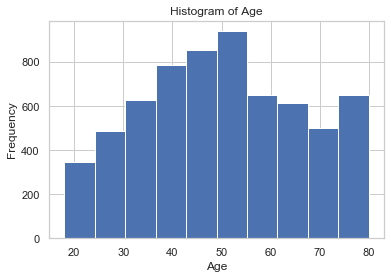

In [354]:
#check the age range of patient
data_test.DMDHRAGE.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


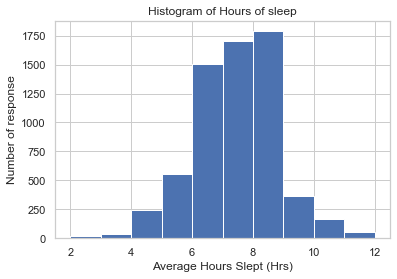

In [483]:
#check the age range of patient
df_combo.SLD010H.hist()
plt.title('Histogram of Hours of sleep')
plt.xlabel('Average Hours Slept (Hrs)')
plt.ylabel('Number of response')
plt.savefig('hist_sleep')

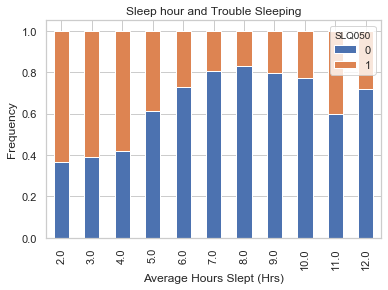

In [425]:
#marital status and sleep percentage
table=pd.crosstab(df_combo.SLD010H,df_combo['SLQ050'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sleep hour and Trouble Sleeping')
plt.xlabel('Average Hours Slept (Hrs)')
plt.ylabel('Frequency')
plt.savefig('Sleep hour1')
plt.show()



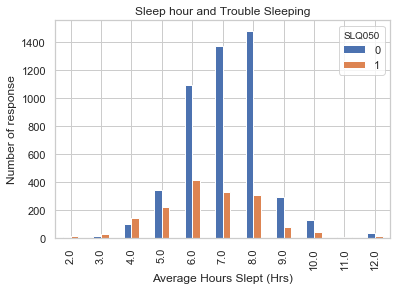

In [479]:
#marital status and sleep
%matplotlib inline
pd.crosstab(df_combo.SLD010H,df_combo['SLQ050']).plot(kind='bar')
plt.title('Sleep hour and Trouble Sleeping')
plt.xlabel('Average Hours Slept (Hrs)')
plt.ylabel('Number of response')
plt.savefig('Sleep hour2')
plt.show()



Text(0, 0.5, 'Frequency of people')

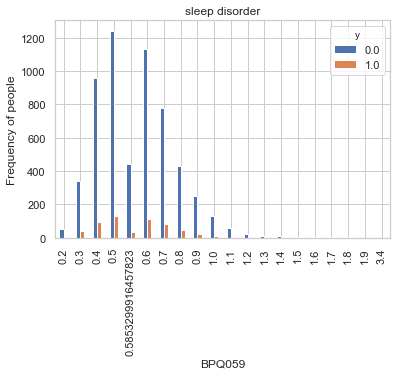

In [480]:
#marital status and sleep
%matplotlib inline
pd.crosstab(data2x.LBDMONO,data2x['y']).plot(kind='bar')
plt.title('sleep disorder')
plt.xlabel('BPQ059')
plt.ylabel('Frequency of people')

Text(0, 0.5, 'Frequency of people')

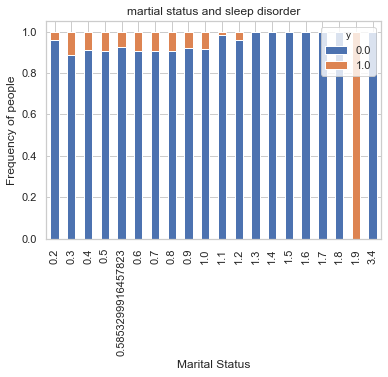

In [411]:
#marital status and sleep percentage
table=pd.crosstab(data2x.LBDMONO,data2x['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('martial status and sleep disorder')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of people')
plt.show()

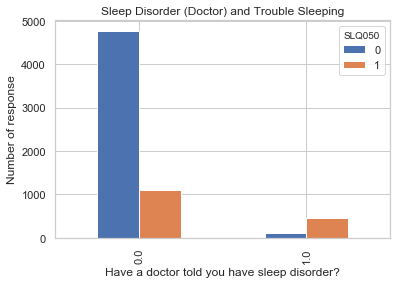

In [481]:
#SLQ060 and sleep
%matplotlib inline
pd.crosstab(df_combo.SLQ060,df_combo['SLQ050']).plot(kind='bar')
plt.title('Sleep Disorder (Doctor) and Trouble Sleeping')
plt.xlabel('Have a doctor told you have sleep disorder?')
plt.ylabel('Number of response')
plt.savefig('Sleep doctors')
plt.show()



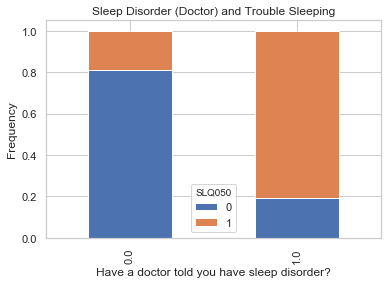

In [441]:
#SLQ060 and sleep percentage
table=pd.crosstab(df_combo.SLQ060,df_combo['SLQ050'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sleep Disorder (Doctor) and Trouble Sleeping')
plt.xlabel('Have a doctor told you have sleep disorder?')
plt.ylabel('Frequency')
plt.savefig('Sleep doctor2')
plt.show()



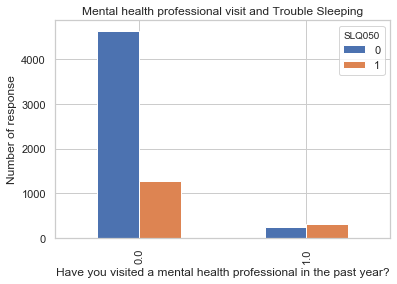

In [482]:
#HUQ090 and sleep #
%matplotlib inline
pd.crosstab(df_combo.HUQ090,df_combo['SLQ050']).plot(kind='bar')
plt.title('Mental health professional visit and Trouble Sleeping')
plt.xlabel('Have you visited a mental health professional in the past year?')
plt.ylabel('Number of response')
plt.savefig('Sleep mental1')
plt.show()

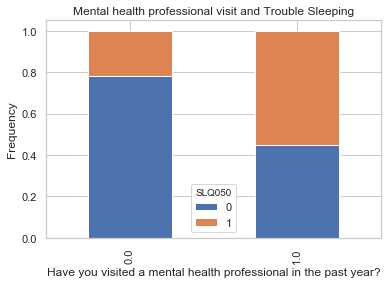

In [435]:
#HUQ090 and sleep percentage
table=pd.crosstab(df_combo.HUQ090,df_combo['SLQ050'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Mental health professional visit and Trouble Sleeping')
plt.xlabel('Have you visited a mental health professional in the past year?')
plt.ylabel('Frequency')
plt.savefig('Sleep mental2')
plt.show()



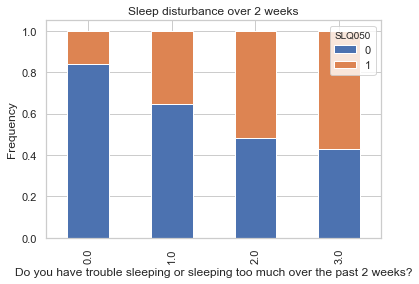

In [508]:
#DPQ030 and sleep percentage
table=pd.crosstab(df_combo.DPQ030,df_combo['SLQ050'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sleep disturbance over 2 weeks')
plt.xlabel('Do you have trouble sleeping or sleeping too much over the past 2 weeks?')
plt.ylabel('Frequency')
plt.savefig('Sleep trouble2')
plt.show()



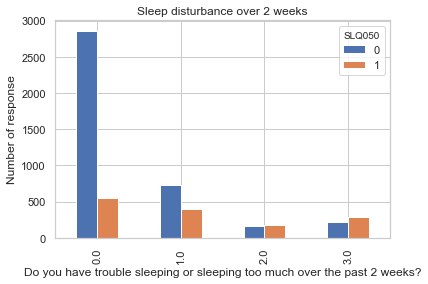

In [509]:
#DPQ030 and sleep #
%matplotlib inline
pd.crosstab(df_combo.DPQ030,df_combo['SLQ050']).plot(kind='bar')
plt.title('Sleep disturbance over 2 weeks')
plt.xlabel('Do you have trouble sleeping or sleeping too much over the past 2 weeks?')
plt.ylabel('Number of response')
plt.savefig('Sleep trouble1')
plt.show()

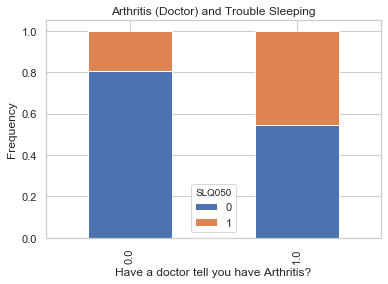

In [504]:
#concentrate and sleep percentage
table=pd.crosstab(df_combo.MCQ160A,df_combo['SLQ050'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Arthritis (Doctor) and Trouble Sleeping')
plt.xlabel('Have a doctor tell you have Arthritis?')
plt.ylabel('Frequency')
plt.savefig('Sleep con')
plt.show()

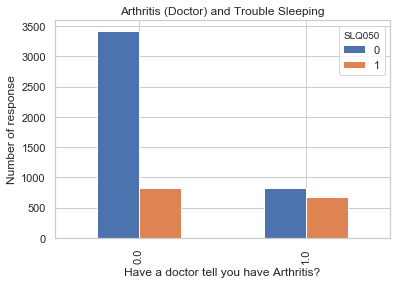

In [505]:
#concentrate and sleep #
%matplotlib inline
pd.crosstab(df_combo.MCQ160A,df_combo['SLQ050']).plot(kind='bar')
plt.title('Arthritis (Doctor) and Trouble Sleeping')
plt.xlabel('Have a doctor tell you have Arthritis?')
plt.ylabel('Number of response')
plt.savefig('Sleep Arth')
plt.show()

In [466]:
df_combo['SLQ050'].value_counts()

0    4880
1    1582
Name: SLQ050, dtype: int64

In [475]:
df_plot = df_combo.replace({'SLQ050':1}, 'Yes')

df_plot = df_plot.replace({'SLQ050':0}, 'No')

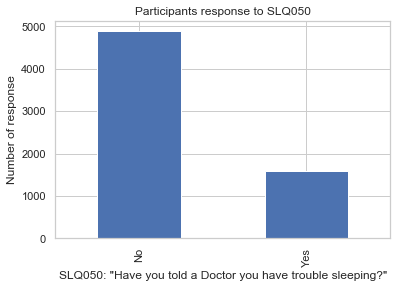

In [484]:
df_plot['SLQ050'].value_counts().plot(kind='bar',  stacked=True)
plt.title('Participants response to SLQ050')
plt.xlabel('SLQ050: "Have you told a Doctor you have trouble sleeping?"')
plt.ylabel('Number of response')
plt.show()

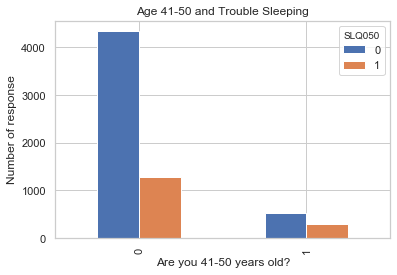

In [510]:
#concentrate and sleep #
%matplotlib inline
pd.crosstab(df_combo.Age_btwn_40_50,df_combo['SLQ050']).plot(kind='bar')
plt.title('Age 41-50 and Trouble Sleeping')
plt.xlabel('Are you 41-50 years old?')
plt.ylabel('Number of response')
plt.savefig('Sleep age50')
plt.show()

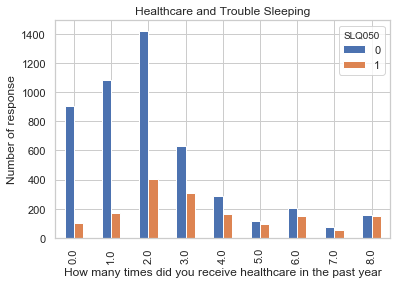

In [512]:
#concentrate and sleep #
%matplotlib inline
pd.crosstab(df_combo.HUQ051,df_combo['SLQ050']).plot(kind='bar')
plt.title('Healthcare and Trouble Sleeping')
plt.xlabel('How many times did you receive healthcare in the past year?')
plt.ylabel('Number of response')
plt.savefig('Sleep healthcare')
plt.show()

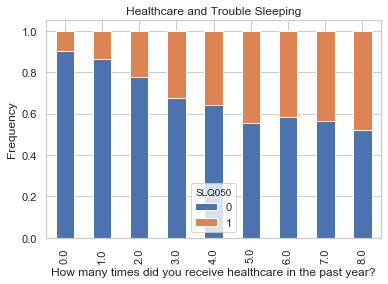

In [514]:
#concentrate and sleep percentage
table=pd.crosstab(df_combo.HUQ051,df_combo['SLQ050'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Healthcare and Trouble Sleeping')
plt.xlabel('How many times did you receive healthcare in the past year?')
plt.ylabel('Frequency')
plt.savefig('Sleep healthcare2')
plt.show()